In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "../data/census/"
race_df = pd.read_csv(PATH + "race.csv")

In [8]:
# White
# Black or African American
# American Indian and Alaska Native
# Asian
# Native Hawaiian and Other Pacific Islander
# Some Other Race alone

def fix_labels(df):
    df["Label (Grouping)"] = df["Label (Grouping)"].map(lambda x: x.lstrip('\xa0'))

def convert_series_to_int(series):
    new_series = [int("".join(x.split(","))) if type(x) == str else x for x in series.values]
    return np.asarray(new_series)
    
    
    
fix_labels(race_df)

In [195]:
# Get the indeces of the summary rows
idcs = race_df[race_df["Label (Grouping)"].str.contains("Population")].index

# Drop all the summary rows and the ones that contain "race x alone"
mixed_race_df = race_df.drop(idcs).drop(range(2,8)).drop(0)

# Create a summary row of all mixed races
mixed_race_row = mixed_race_df.iloc[:, 1:].apply(convert_series_to_int).apply(np.sum)

# Add Mixed Race row to race dataframe
new_race_df = race_df[:8]
new_race_df.loc[len(new_race_df)] = ["Mixed Race"] + list(mixed_race_row)
new_race_df = new_race_df.drop(1)

# Convert the columns to correct integer values (no comma inbetween numbers)
new_race_df.iloc[:, 1:] = new_race_df.iloc[:, 1:].apply(convert_series_to_int)

# Now we have all the necessary rows to make a distribution of the races per Tract (and Block Group if we want)
# In order to not have the plots too messy, let's divide the columns into Tracts first

# If you want to race by block group, do not execute next cell!

In [202]:
# Group Columns by Tract
new_race_df.columns = list(new_race_df.columns[:2]) + [x[1].split(", District")[0][1:] 
                                                       for x in new_race_df.iloc[:, 2:].columns.str.split("Census")]
race_by_tract_df = new_race_df.groupby(new_race_df.columns, axis=1).sum()

# Add Column for all of Southwest
race_by_tract_df["Southwest"] = race_by_tract_df.iloc[:, 2:].sum(axis=1)

In [203]:
race_by_tract_df

,District of Columbia,Label (Grouping),Tract 102.01,Tract 102.02,Tract 105,Tract 110.01,Tract 110.02,Tract 64,Southwest
0,689545,Total:,3341,2631,3712,2423,1859,2481,16447
2,273194,White alone,1793,1437,1487,1046,1226,609,7598
3,285810,Black or African American alone,853,647,1553,941,361,1646,6001
4,3193,American Indian and Alaska Native alone,11,10,17,6,4,21,69
5,33545,Asian alone,233,209,241,139,97,33,952
6,432,Native Hawaiian and Other Pacific Islander alone,0,1,2,0,0,2,5
7,37294,Some Other Race alone,94,82,99,53,35,33,396
8,56077,Mixed Race,357,245,313,238,136,137,1426


In [269]:
race_labels = [x.split(" alone")[0] for x in list(race_by_tract_df["Label (Grouping)"].values)]
race_distributions = {}

# Calculate the distribution of a race per tract and save into a dict (with key being the location)
for column_name in race_by_tract_df.columns:
    if column_name == "Label (Grouping)":
        continue
        
    race_distributions[column_name] = race_by_tract_df[column_name].apply(lambda x: x / race_by_tract_df[column_name][0]).values


In [315]:
race_distributions_df = pd.DataFrame(race_distributions, index=race_labels)

In [323]:
columns = race_distributions_df.columns
columns

Index(['District of Columbia', 'Tract 102.01', 'Tract 102.02', 'Tract 105',
       'Tract 110.01', 'Tract 110.02', 'Tract 64', 'Southwest'],
      dtype='object')

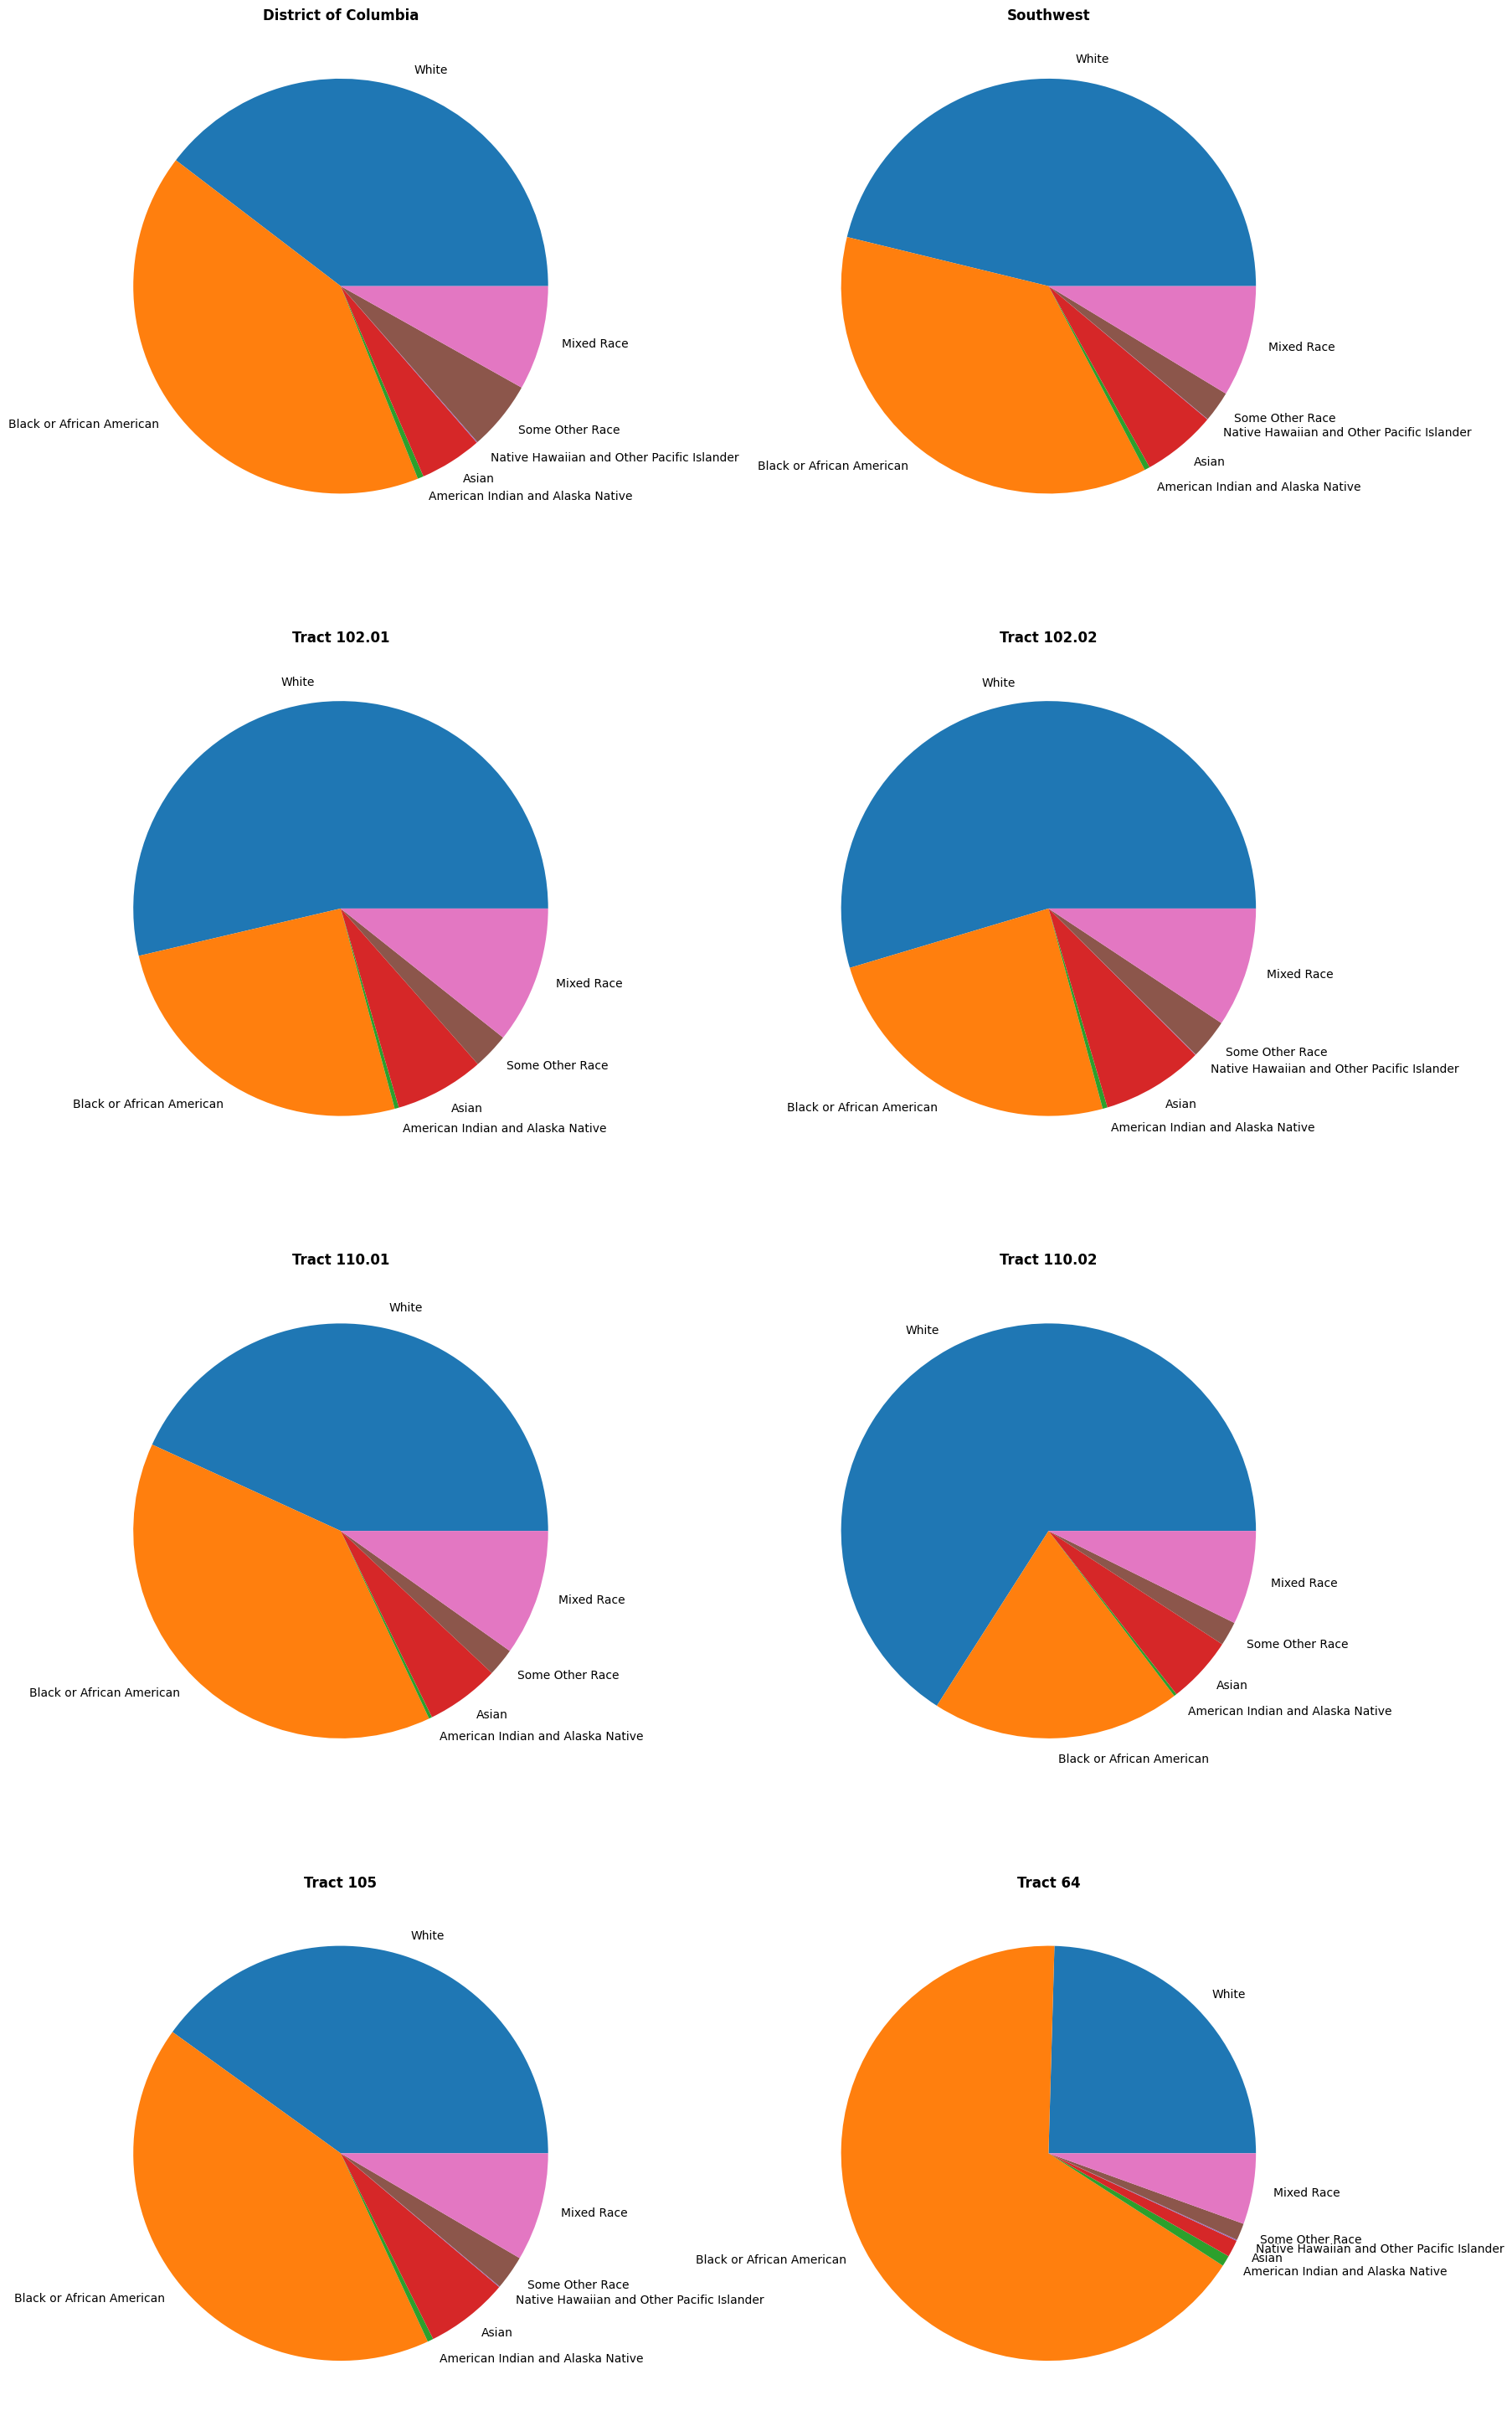

In [329]:
columns = race_distributions_df.columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 37))

race_distributions_df.iloc[1:, 0].plot.pie(subplots=True, ax=axes[0, 0])
axes[0,0].set_title(columns[0], fontweight="bold")
axes[0,0].set_ylabel('')

race_distributions_df.iloc[1:, 7].plot.pie(subplots=True, ax=axes[0, 1])
axes[0,1].set_title(columns[7], fontweight="bold")
axes[0,1].set_ylabel('')

race_distributions_df.iloc[1:, 1].plot.pie(subplots=True, ax=axes[1, 0])
axes[1,0].set_title(columns[1], fontweight="bold")
axes[1,0].set_ylabel('')

race_distributions_df.iloc[1:, 2].plot.pie(subplots=True, ax=axes[1, 1])
axes[1,1].set_title(columns[2], fontweight="bold")
axes[1,1].set_ylabel('')

race_distributions_df.iloc[1:, 4].plot.pie(subplots=True, ax=axes[2, 0])
axes[2,0].set_title(columns[4], fontweight="bold")
axes[2,0].set_ylabel('')

race_distributions_df.iloc[1:, 5].plot.pie(subplots=True, ax=axes[2, 1])
axes[2,1].set_title(columns[5], fontweight="bold")
axes[2,1].set_ylabel('')

race_distributions_df.iloc[1:, 3].plot.pie(subplots=True, ax=axes[3, 0])
axes[3,0].set_title(columns[3], fontweight="bold")
axes[3,0].set_ylabel('')

race_distributions_df.iloc[1:, 6].plot.pie(subplots=True, ax=axes[3, 1])
axes[3,1].set_title(columns[6], fontweight="bold")
axes[3,1].set_ylabel('')

fig.show()
plt.savefig("../plots/race/race_distribution_per_location.png")
plt.savefig("../plots/race/race_distribution_per_location.pdf")